In [29]:
import os
import sys

dirname = '../../data/AmphiBase'

filename_fa = os.path.join(dirname, 'HYNYA_AB201711.prot.fa')

count_total = 0
count_NA = 0
COG_freq = dict()
f_fa = open(filename_fa,'r')
for line in f_fa:
    if line.startswith('>'):
        count_total += 1
        tmp_COG = line.strip().split()[2]
        if tmp_COG == 'NA':
            count_NA += 1
            continue
            
        for tmp_COG_code in tmp_COG.split('|')[0].split('=')[1]:
            if not tmp_COG_code in COG_freq:
                COG_freq[tmp_COG_code] = 0
            COG_freq[tmp_COG_code] += 1
f_fa.close()
print(COG_freq)

COG_annot = dict()
COG_code_list = []
f_label = open(os.path.join(dirname, 'eggnog4.functional_categories.txt'),'r')
for line in f_label:
    if line.strip() == '':
        continue
    if line.startswith(' ['):
        tokens = line.strip().split()
        tmp_COG_code = tokens[0].replace('[','').replace(']','')
        COG_code_list.append(tmp_COG_code)
        COG_annot[tmp_COG_code] = {'desc': ' '.join(tokens[1:]), 'category':tmp_COG_category}
    else:
        tmp_COG_category = line.strip()
f_label.close()
#print(COG_annot)

{'S': 2919, 'B': 200, 'D': 291, 'U': 1124, 'Z': 468, 'C': 422, 'Q': 253, 'G': 591, 'T': 1898, 'K': 992, 'A': 592, 'F': 237, 'E': 424, 'M': 81, 'P': 266, 'O': 1569, 'I': 485, 'W': 188, 'J': 958, 'Y': 43, 'V': 159, 'L': 259, 'H': 116, 'N': 15}


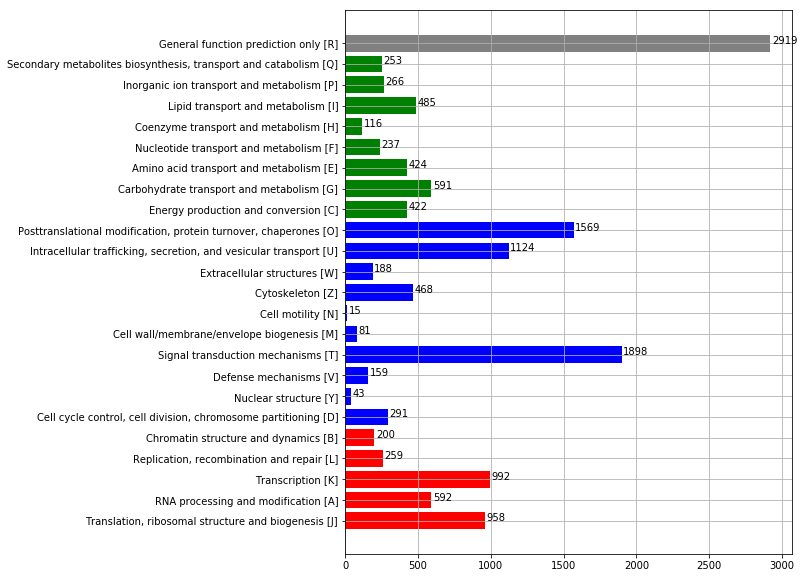

In [30]:
%matplotlib inline

bar_color = dict()
bar_color['INFORMATION STORAGE AND PROCESSING'] = 'red'
bar_color['CELLULAR PROCESSES AND SIGNALING'] = 'blue'
bar_color['METABOLISM'] = 'green'
bar_color['POORLY CHARACTERIZED'] = 'grey'

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(1,1,1)

i = 0
for tmp_COG_code in COG_code_list:
    if tmp_COG_code in COG_freq:
        tmp_color = bar_color[ COG_annot[tmp_COG_code]['category']] 
        ax1.barh(i, COG_freq[tmp_COG_code], facecolor=tmp_color)
        ax1.text(COG_freq[tmp_COG_code]+10, i,'%d'%COG_freq[tmp_COG_code])
        i += 1
ax1.set_yticks([x for x in range(i)])
ax1.set_yticklabels(['%s [%s]'%(COG_annot[x]['desc'], x) for x in COG_code_list])
ax1.grid()
plt.show()